In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tt

from sklearn.svm import SVC , LinearSVC

from sklearn.model_selection import GridSearchCV as grid
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , roc_curve

import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
    
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# **Data Viz**

In [5]:
discreteFeat = ['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking']

contFeat = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

In [6]:
plt.style.use('fivethirtyeight')

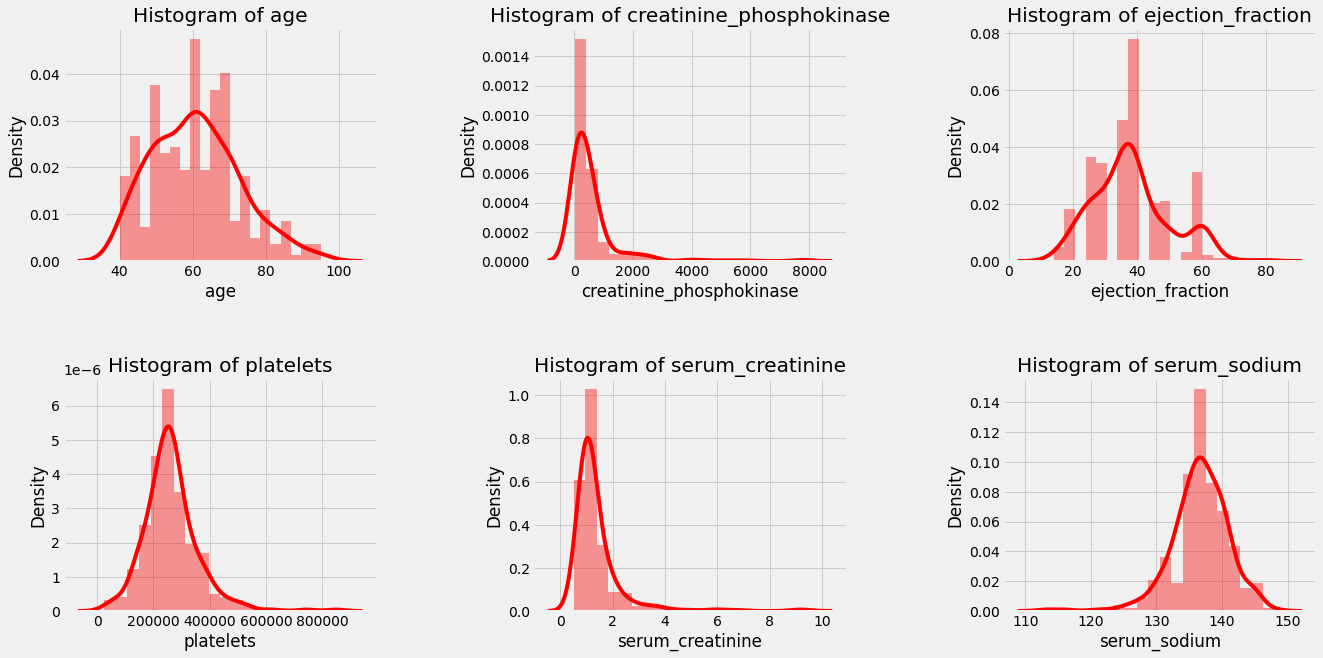

In [7]:
plt.figure(1, figsize = (20,10))
n=0
for x in contFeat:
    n+=1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20, color = 'red')
    plt.title('Histogram of {}'.format(x))
    
plt.show()

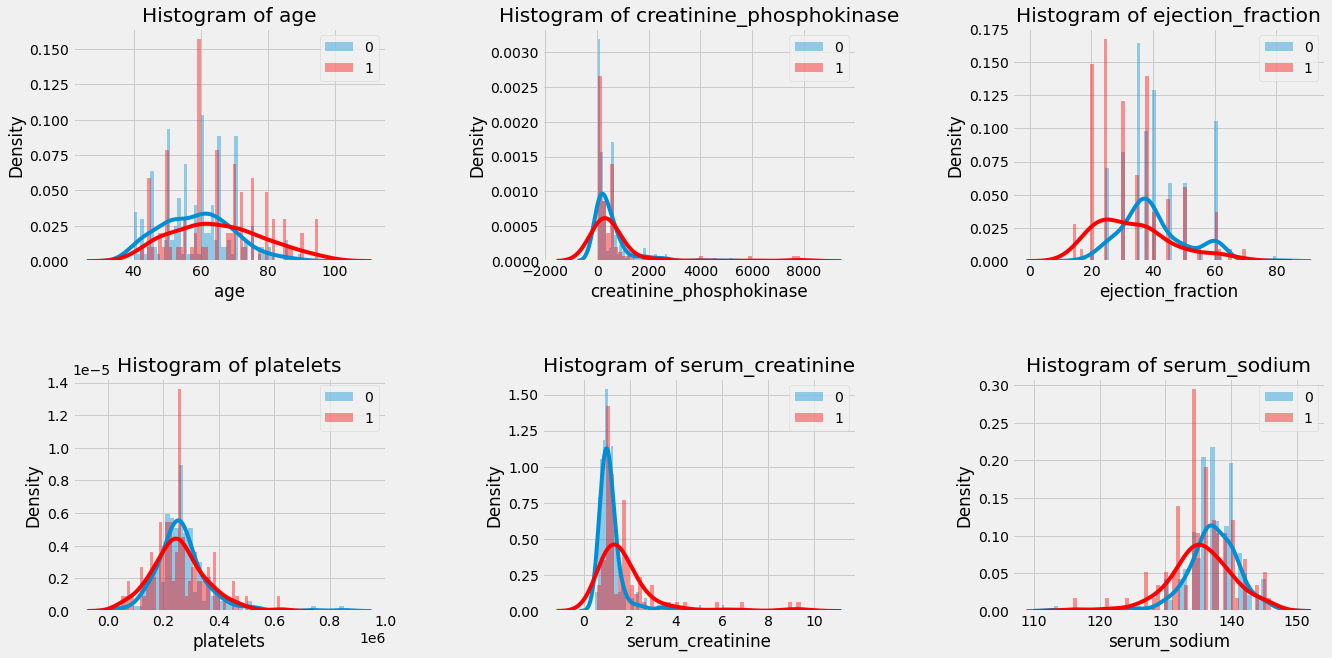

In [8]:
plt.figure(1, figsize = (20,10))
n=0
for f in contFeat:
    n+=1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[f][df['DEATH_EVENT'] == 0], bins = 50, label = '0')
    sns.distplot(df[f][df['DEATH_EVENT'] == 1], bins = 50, label = '1', color = 'red')
    plt.title('Histogram of {}'.format(f))
    plt.legend()

plt.show()

# **Ejection Fraction**
Ejection fraction (EF) measures the amount of blood pumped out of your heart ’s lower chambers, or ventricles. It’s the percentage of blood that leaves your left ventricle when your heart contracts.

A normal ejection fraction is about **50% to 75%**, according to the American Heart Association. A borderline ejection fraction can range between **41% and 50%**.

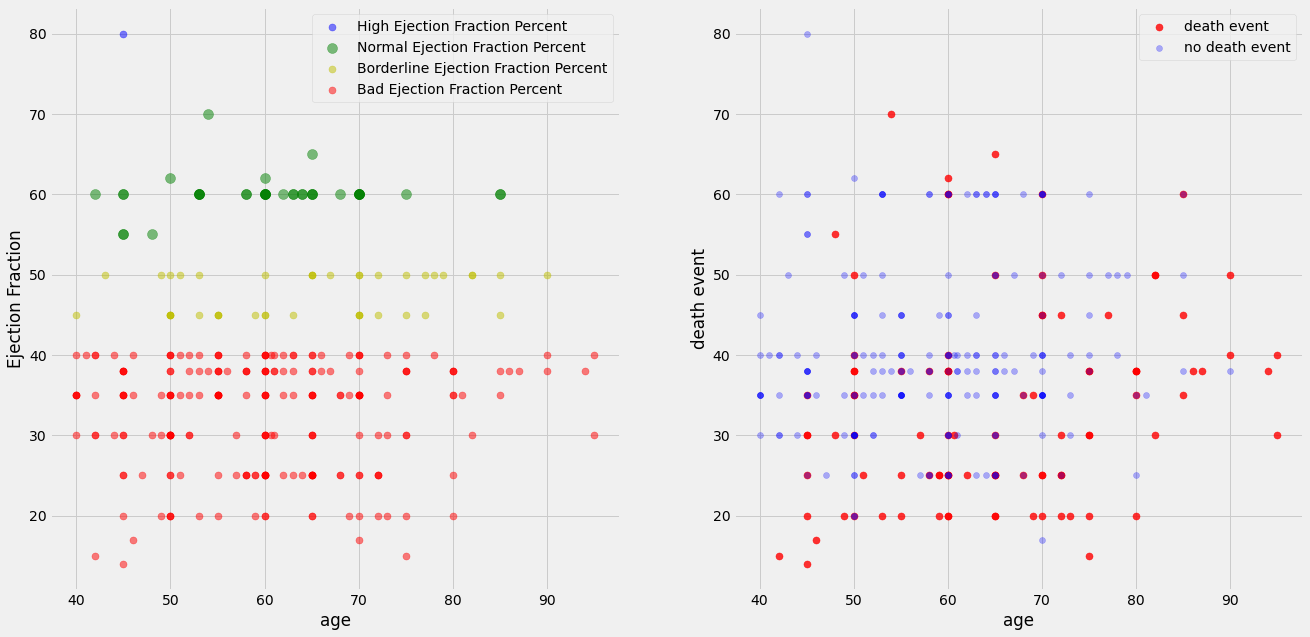

In [9]:
plt.figure(1, figsize = (20,10))
plt.subplot(1, 2, 1)

# A normal ejection fraction is 50% - 75%
plt.scatter( x = 'age', y = 'ejection_fraction', data = df[(df['ejection_fraction'] > 75)] , color = 'b', s = 50, alpha = 0.5, label = 'High Ejection Fraction Percent')
plt.scatter(x = 'age', y = 'ejection_fraction', data = df[(df['ejection_fraction'] <= 75) & (df['ejection_fraction'] >50 )] , color = 'green', s = 100, alpha = 0.5, label = 'Normal Ejection Fraction Percent')
plt.scatter( x = 'age', y = 'ejection_fraction', data = df[(df['ejection_fraction'] <= 50) & (df['ejection_fraction'] >=41 )] , color = 'y', s = 50, alpha = 0.5, label = 'Borderline Ejection Fraction Percent')
plt.scatter( x = 'age', y = 'ejection_fraction', data = df[df['ejection_fraction'] < 41] , color = 'r', s = 50, alpha = 0.5, label = 'Bad Ejection Fraction Percent')
plt.xlabel("age")
plt.ylabel("Ejection Fraction")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(x = 'age', y = 'ejection_fraction', data = df[df['DEATH_EVENT'] == 1] , color = 'r', s = 50, alpha = 0.8, label = 'death event')
plt.scatter(x = 'age', y = 'ejection_fraction', data = df[df['DEATH_EVENT'] == 0] , color = 'b', alpha = 0.3, label = 'no death event')
plt.xlabel("age")
plt.ylabel("death event")
plt.legend()

plt.show()
                                                          
#plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df[df['DEATH_EVENT'] == 0 ] , label = 'No Death' , alpha = 0.3 )



#x_ax = "age"
#y_ax = ["ejection_fraction", "DEATH_EVENT"]

#for y in y_ax:
 #   n+=1
  #  figure = plt.figure
   # ax = plt.gca()
    #ax.scatter(df[x_ax], df[y_ax])
   # ax.set_xlabel(df[x_ax])
   # ax.set_ylabel(df[y_ax])
   # ax.set_title("{} vs {}".format(x_ax, y_ax))
#plt.legend()
#plt.show()



#color_ref = {(0,40):"r", (40.1,50):"o", (50.1,100):"g"}
#plt.title('Age vs. Ejection Fraction')
#plt.scatter(x,y)
#plt.xlabel("Age")
#plt.ylabel("Ejection Fraction")
#fig, ax = plt.subplots()
#for clr in color_ref:
#    temp = df[(df.age>=clr[40]) & (df.age<=clr[95])]
#    ax.plot(temp.age,temp.ejection_fraction,color=color_ref[clr])


# **Blood Sodium Level**
The normal blood sodium levels range from 135 to 145 mEq/L. If your result shows that you have a blood sodium level of less than 135 mEq/L, then you may be suffering from hyponatremia. If your result shows that you have a blood sodium level of more than 145 mEq/L, then you may have hypernatremia. Most foods that you eat contain sodium.

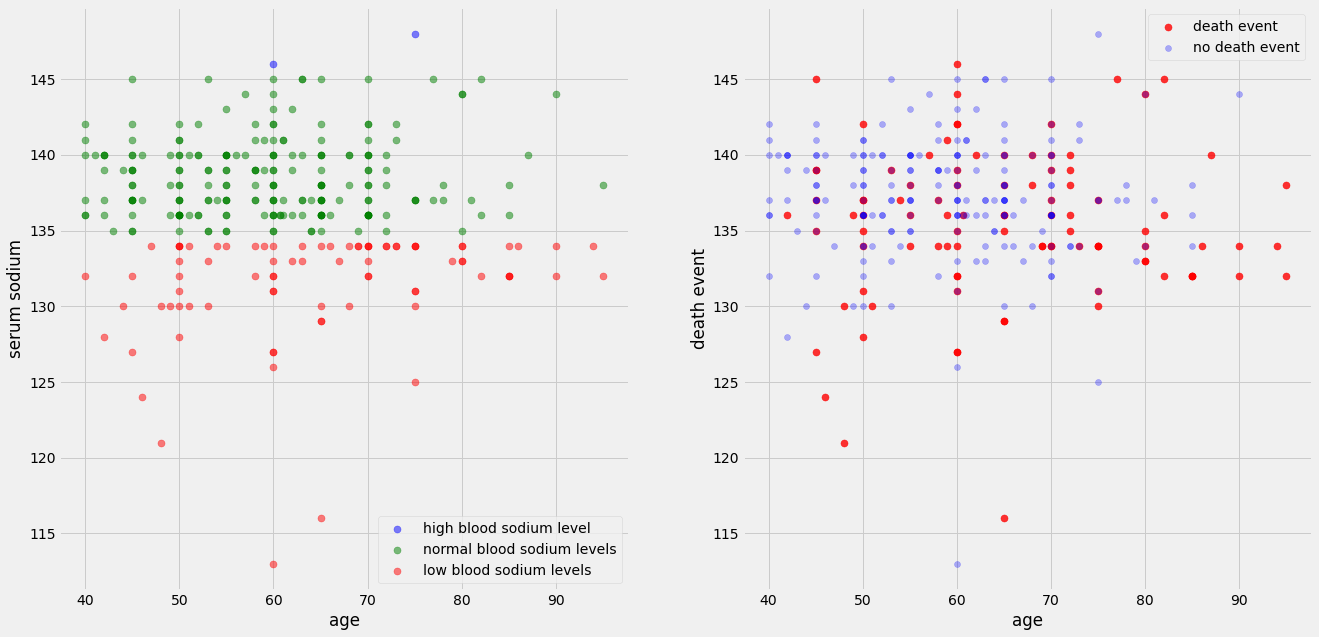

In [10]:
plt.figure(1, figsize = (20,10))

plt.subplot(1 , 2 , 1)
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df[(df['serum_sodium'] > 145)] , color = 'b', s = 50, alpha = 0.5, label = 'high blood sodium level')
plt.scatter(x = 'age', y = 'serum_sodium' , data = df[(df['serum_sodium'] <= 145) & (df['serum_sodium'] >= 135)] , color = 'green' , s = 50, alpha = 0.5 , label = 'normal blood sodium levels')
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df[(df['serum_sodium'] < 135)] , color = 'r', s = 50, alpha = 0.5, label = 'low blood sodium levels')
plt.xlabel("age")
plt.ylabel("serum sodium")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x = 'age', y = 'serum_sodium', data = df[df['DEATH_EVENT'] == 1] , color = 'r', s = 50, alpha = 0.8, label = 'death event')
plt.scatter(x = 'age', y = 'serum_sodium', data = df[df['DEATH_EVENT'] == 0] , color = 'b', alpha = 0.3, label = 'no death event')
plt.xlabel("age")
plt.ylabel("death event")


plt.legend()
plt.show()
            

# **Predictive Modeling**

In [11]:
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values 

xtrain , xtest , ytrain , ytest = tt(x , y ,
                                     test_size=0.1,
                                     random_state=20)

In [12]:
'''Linear SVC i.e No Kernal Trick'''
linear_svc = Pipeline(steps = [('scaler' , StandardScaler()) , 
                               ('linear_svc' , LinearSVC(loss = 'hinge'))])

parameters_linear = { 'linear_svc__C' : [0.0005 , 0.005 , 0.05 , 0.5 , 1 , 1.5 , 2 , 5] }

linearsvcGrid = grid(linear_svc , parameters_linear)

linearsvcGrid.fit(xtrain , ytrain)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_svc',
                                        LinearSVC(loss='hinge'))]),
             param_grid={'linear_svc__C': [0.0005, 0.005, 0.05, 0.5, 1, 1.5, 2,
                                           5]})

In [13]:
linearsvcGrid.cv_results_

{'mean_fit_time': array([0.00175295, 0.00135651, 0.00153255, 0.00184193, 0.00238523,
        0.00261693, 0.00285015, 0.00356994]),
 'std_fit_time': array([6.96865256e-04, 1.49536923e-05, 1.37940509e-04, 9.19255722e-05,
        1.53290695e-04, 1.40819096e-04, 4.99459553e-05, 1.15166845e-04]),
 'mean_score_time': array([0.00055523, 0.00048852, 0.00048704, 0.00047846, 0.00047979,
        0.00048499, 0.00050387, 0.00051522]),
 'std_score_time': array([9.66874088e-05, 1.99235781e-05, 2.78651657e-05, 1.53763534e-05,
        1.63135463e-05, 1.00094923e-05, 1.81183061e-05, 1.90072100e-05]),
 'param_linear_svc__C': masked_array(data=[0.0005, 0.005, 0.05, 0.5, 1, 1.5, 2, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'linear_svc__C': 0.0005},
  {'linear_svc__C': 0.005},
  {'linear_svc__C': 0.05},
  {'linear_svc__C': 0.5},
  {'linear_svc__C': 1},
  {'linear_svc__C': 1.5},
  {'linear_svc__C': 2},
  {

In [14]:
linearsvcGrid.best_params_

{'linear_svc__C': 1}

In [15]:
linear_svc = Pipeline(steps = [('scaler' , StandardScaler()) , 
                               ('linear_svc' , LinearSVC(C = 1 , loss = 'hinge'))])


linear_svc.fit(xtrain , ytrain)
yPred_LinearSVC = linear_svc.predict(xtest)

In [16]:
print(confusion_matrix(ytest , yPred_LinearSVC))
print('')
print('Accuracy : {}'.format(accuracy_score(ytest , yPred_LinearSVC)))
print('')
print('Classification Report : \n{}'.format(classification_report(ytest , yPred_LinearSVC)))

[[19  4]
 [ 1  6]]

Accuracy : 0.8333333333333334

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.60      0.86      0.71         7

    accuracy                           0.83        30
   macro avg       0.77      0.84      0.79        30
weighted avg       0.87      0.83      0.84        30



# **Non-Linear Support Vector Machine Classifier (Polynomial and Gaussian RBF Kernels)**

In [17]:
'''Non Linear SVC'''

kernelSVC = Pipeline(steps = [('scaler' , StandardScaler()) , 
                              ('svc' , SVC())])

parameters = {'svc__kernel': ['poly' , 'rbf'] ,
              'svc__coef0' : [1] ,
              'svc__C' : [0.005 , 0.05 , 0.5 , 1 , 1.5 ] ,
              'svc__degree' : [2 , 3 , 10 ], 
              'svc__gamma' : [0.5 , 1 , 5 , 10 ]
             }

SupportVM_Classifier_grid = grid(kernelSVC , parameters)
SupportVM_Classifier_grid.fit(xtrain , ytrain)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.005, 0.05, 0.5, 1, 1.5],
                         'svc__coef0': [1], 'svc__degree': [2, 3, 10],
                         'svc__gamma': [0.5, 1, 5, 10],
                         'svc__kernel': ['poly', 'rbf']})

In [18]:
SupportVM_Classifier_grid.best_params_

{'svc__C': 0.05,
 'svc__coef0': 1,
 'svc__degree': 2,
 'svc__gamma': 0.5,
 'svc__kernel': 'poly'}

In [19]:
''''After running Crossvalidation : polynomial kernel performs better on this data than rbf kernel'''

kernelSVC = Pipeline(steps = [('scaler' , StandardScaler()) , 
                              ('svc' , SVC(kernel = 'poly' , C = 0.05 , degree = 2))])

kernelSVC.fit(xtrain , ytrain)
yPred_kernel = kernelSVC.predict(xtest)

Evaluating the Results from Polynomial Kernel SVC Model

In [20]:
print(confusion_matrix(ytest , yPred_kernel))
print('')
print('Accuracy : {}'.format(accuracy_score(ytest , yPred_kernel)))
print('')
print('Classification Report : \n{}'.format(classification_report(ytest , yPred_kernel)))

[[23  0]
 [ 6  1]]

Accuracy : 0.8

Classification Report : 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.14      0.25         7

    accuracy                           0.80        30
   macro avg       0.90      0.57      0.57        30
weighted avg       0.84      0.80      0.74        30

